Data diambil dari dataset Produksi Tanaman Padi Pulau Sumatera Tahun 1993-2020. 
Pada program ini akan dilakukan analisis data dan prediksi produksi tanaman padi berdasarkan variabel Luas Panen, Curah hujan, Kelembapan, dan Suhu rata-rata. 

Sebelum melakukan prediksi pada data baru, terlebih dahulu menentukan model mana yang tepat digunakan untuk melakukan prediksi produksi tanaman padi dengan melihat nilai R2-score antara model **Linear Regression** dan **Random Forest**

In [2]:
# Membaca dan memahami data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Data_Tanaman_Padi_Sumatera.csv')

data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
data.shape

(224, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.00,224.00,224.00,224.00,224.00,224.00
mean,2006.50,1679700.89,374349.97,2452.49,80.95,26.80
std,8.10,1161387.39,232751.16,1031.97,4.88,1.20
min,1993.00,42938.00,63142.04,222.50,54.20,22.19
25%,1999.75,548857.00,146919.50,1703.53,78.97,26.18
50%,2006.50,1667773.00,373551.50,2315.70,82.38,26.73
75%,2013.25,2436850.75,514570.25,3039.70,84.00,27.20
max,2020.00,4881089.00,872737.00,5522.00,90.60,29.85


In [ ]:
data.tail()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
219,Lampung,2016,3831923.00,390799.00,2317.60,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.10,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.80,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.40,78.03,27.23
223,Lampung,2020,2604913.29,545149.05,2211.30,75.80,24.58


In [4]:
#Cek missing values dari dataset

def missing_values_table(data): 
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum()/len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

missing_values_table(data)

,Missing Values,% of Total Values
Provinsi,0,0.0
Tahun,0,0.0
Produksi,0,0.0
Luas Panen,0,0.0
Curah hujan,0,0.0
Kelembapan,0,0.0
Suhu rata-rata,0,0.0


In [ ]:
# Melihat nilai rata-rata Curah hujan, Kelembapan, Luas Panen, Suhu, dan Produksi (1993-2020) berdasarkan Provinsi 
# Menggunakan pivot tabel dengan index Provinsi 
pivot_provinsi = pd.pivot_table(data, index=['Provinsi'], 
                                values=['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata'], 
                                aggfunc='mean')
pivot_provinsi

,Curah hujan,Kelembapan,Luas Panen,Produksi,Suhu rata-rata
Provinsi,,,,,
Aceh,1485.75,80.50,347109.52,1618736.77,27.03
Bengkulu,3228.02,82.44,111777.55,444964.85,26.58
Jambi,1998.32,81.84,150722.13,552863.81,26.96
Lampung,1925.30,79.07,518478.62,2444067.77,26.78
Riau,2465.00,80.32,126071.40,407464.52,27.01
Sumatera Barat,3878.75,81.49,402614.77,1990395.54,25.65
Sumatera Selatan,2429.87,80.86,623007.25,2648642.59,27.08
Sumatera Utara,2208.92,81.07,715018.50,3330471.24,27.31


In [ ]:
# Melihat Tren setiap variabel dari tahun 1993 sampai 2020 
# Menggunakan pivot tabel denagn index Tahun
pivot_tahun = pd.pivot_table(data, index=['Tahun'], values=['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata'], aggfunc='mean')
pivot_tahun 

,Curah hujan,Kelembapan,Luas Panen,Produksi,Suhu rata-rata
Tahun,,,,,
1993,2906.31,84.86,350114.25,1313888.25,26.03
1994,2281.19,81.25,348414.62,1304359.88,25.92
1995,3140.31,84.01,375457.25,1409734.75,26.14
1996,2599.75,83.81,383503.12,1460241.38,25.89
1997,1583.53,82.20,362133.38,1383697.75,26.18
1998,2917.36,84.16,395257.38,1467048.75,26.51
1999,2727.60,83.16,385883.25,1477006.38,25.65
2000,2124.79,84.98,381923.25,1487672.38,26.52
2001,2614.06,72.07,361182.75,1446382.00,28.08


In [ ]:
# Melihat tren setiap variabel pada setiap provinsi di Pulau Sumatera pada Tahun 2020
data_2020 = data.query('Tahun == 2020')
data_2020

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
27,Aceh,2020,1861567.10,317869.41,1619.20,80.82,25.41
55,Sumatera Utara,2020,2076280.01,388591.22,1648.30,83.76,25.79
83,Sumatera Barat,2020,1450839.74,295664.47,4072.70,85.22,26.26
111,Riau,2020,269344.05,64733.13,2584.90,81.80,25.93
139,Jambi,2020,374376.27,84772.93,2303.80,78.24,25.85
167,Sumatera Selatan,2020,2696877.46,551320.76,2300.20,81.10,26.14
195,Bengkulu,2020,296925.16,64137.28,4144.00,80.18,25.84
223,Lampung,2020,2604913.29,545149.05,2211.30,75.80,24.58


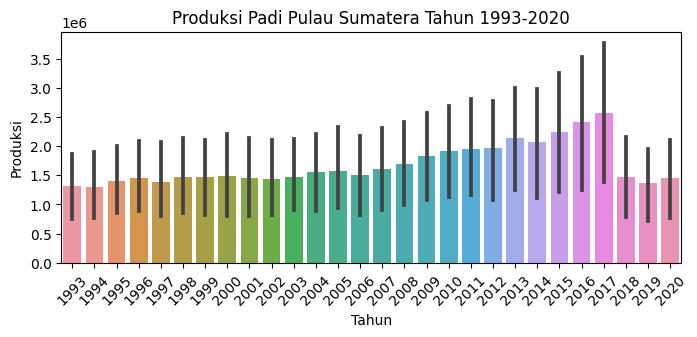

In [ ]:
# Visualisasi untuk memahami Jumlah Produksi Padi pulau Sumatera dari Tahun 1993-2020
plt.figure(figsize=(8,3))
sns.barplot(data, x='Tahun', y='Produksi')
plt.xticks(rotation=45)
plt.title('Produksi Padi Pulau Sumatera Tahun 1993-2020')
plt.show()

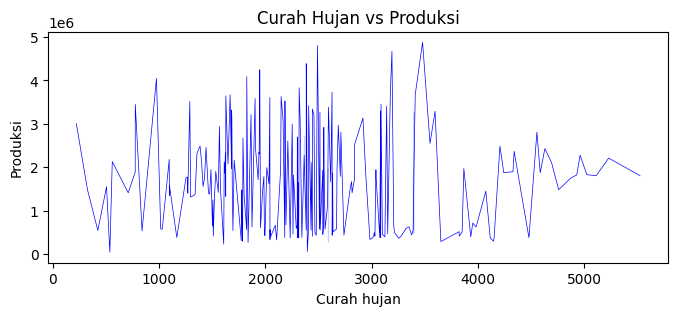

In [ ]:
# Melihat tingkat Produksi Padi berdasarkan kondisi Curah Hujan di Pulau Sumatera
plt.figure(figsize=(8,3))
sns.lineplot(data, x='Curah hujan', y='Produksi', color='blue', linewidth=0.5)
plt.title('Curah Hujan vs Produksi')
plt.show()

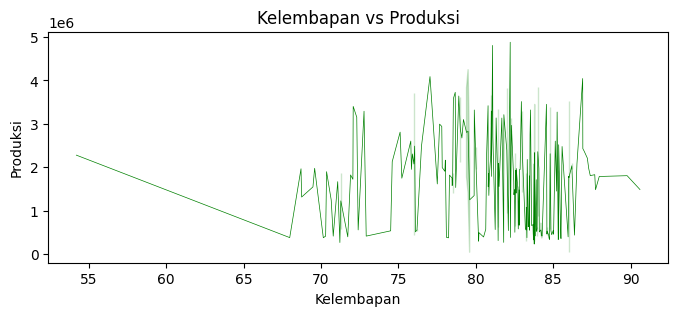

In [ ]:
# Melihat tingkat Produksi Padi berdasarkan kondisi Kelembapan di Pulau Sumatera
plt.figure(figsize=(8,3))
sns.lineplot(data, x='Kelembapan', y='Produksi', color='green', linewidth=0.5)
plt.title('Kelembapan vs Produksi')
plt.show()

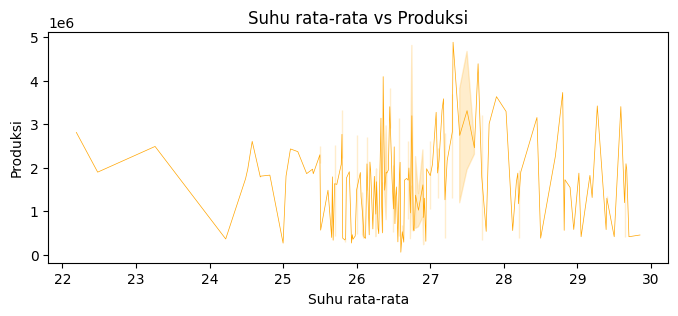

In [ ]:
# Melihat tingkat Produksi Padi berdasarkan kondisi Suhu rata-rata di Pulau Sumatera
plt.figure(figsize=(8,3))
sns.lineplot(data, x='Suhu rata-rata', y='Produksi', color='orange', linewidth=0.5)
plt.title('Suhu rata-rata vs Produksi')
plt.show()

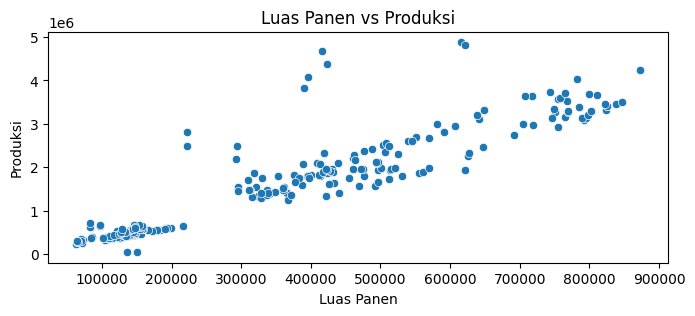

In [ ]:
# Melihat sebaran data hubungan antara Luas Panen dan Tingkat Produksi Padi di Pulau Sumatera
plt.figure(figsize=(8,3))
sns.scatterplot(data, x='Luas Panen', y='Produksi')
plt.title('Luas Panen vs Produksi')
plt.show()

**ANALISA DATA DAN PENERAPAN MODEL MACHINE LEARNING**

**1. Distribusi dari Production Quantities**

Probability plot digunakan untuk mengevaluasi sejauh mana distribusi data yang diamati cocok dengan distribusi teoretis tertentu seperti distribusi normal. Plot ini adalah representasi grafis dari nilai-nilai data asli yang dipetakan pada sumbu x dan nilai-nilai yang diharapkan (dalam hal ini nilai-nilai yang diharapkan berdasarkan distribusi normal) yang dipetakan pada sumbu y.

Probability plot pada Seaborn menggunakan regresi quantile-quantile untuk menunjukkan bagaimana sampel data menyesuaikan dengan distribusi teoretis. Grafik ini menciptakan garis lurus untuk membantu membaca distribusi data. Jika data diplot dekat dengan garis lurus, maka data tersebut mengikuti distribusi teoretis. Jika data tidak mengikuti garis lurus, maka data tersebut tidak mengikuti distribusi teoretis.

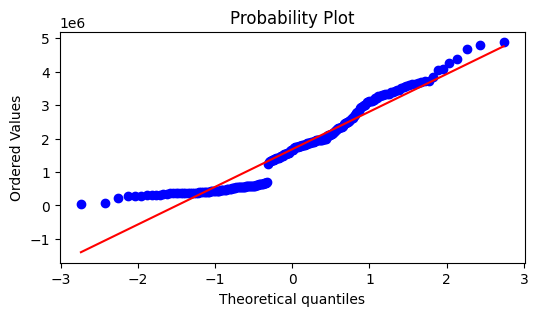

In [ ]:
#statistical plot
import scipy.stats as stats
import pylab as py

plt.figure(figsize=(6,3))
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

**2. Cek Outlier dari Variabel Output (Produksi)**

<Axes: >

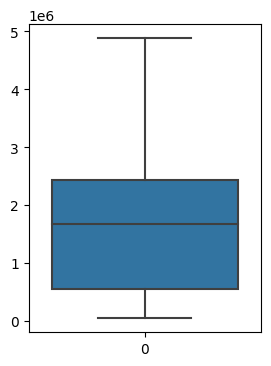

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(data['Produksi'])

**3. Correlation Matrix antar Variabel**

Note: 

Correlation >= 0.5 there is a coherent relationship between variables

Correlation < 0.5 there is no close relationship between variables

Text(0.5, 1.0, 'Korelasi Antar Variabel \n')

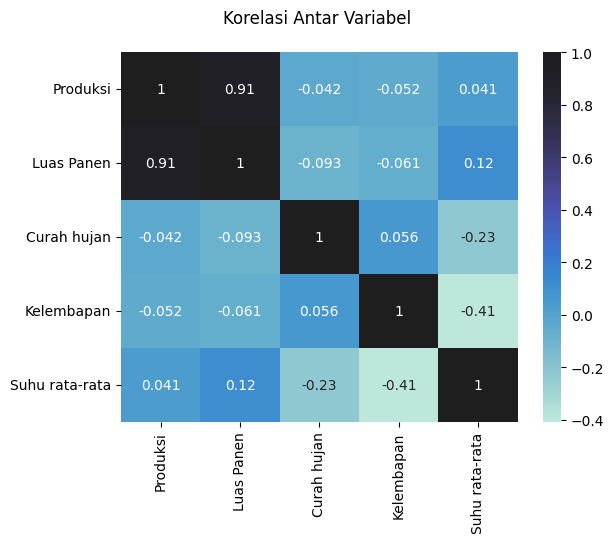

In [ ]:
#Menampilkan heatmap untuk melihat korelasi antar variabel 
sns.heatmap(data.loc[:, 'Produksi': 'Suhu rata-rata'].corr(), annot=True, center=1, fmt='.2g')
plt.title('Korelasi Antar Variabel \n')

dari Heatmap diatas, nampak bahwa variabel yang memiliki korelasi yang kuat adalah variabel **Luas Panen dan Produksi** dengan nilai **0.91 (berkorelasi positif)**

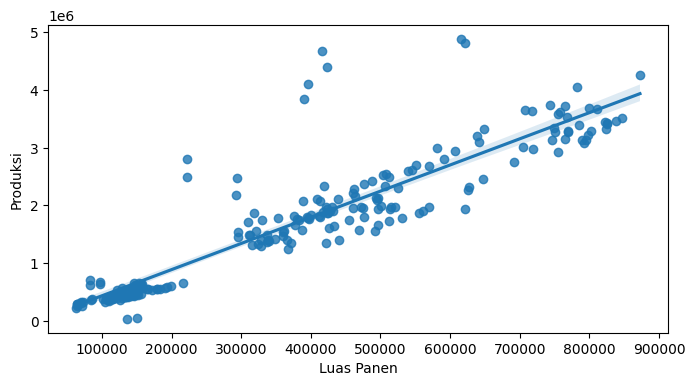

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x='Luas Panen', y='Produksi', data=data)
plt.show()

**4. Pemisahan Data (Train-Test Split)**

Train-test split dilakukan untuk membagi dataset menjadi data train (latih) dan data test (uji) berdasarkan proporsi tertentu yang ditentukan. 

Data train dan Data test selanjutnya akan digunakan untuk melatih program agar dapat belajar dari data dalam memprediksi produksi tanaman padi. 

Data test digunakan untuk menguji program dalam menentukan prediksi produksi tanaman padi di masa depan, yang kemudian hasil dari prediksi tersebut akan dibandingkan dengan data produksi aktual untuk melihat akurasi dari hasil prediksi

In [ ]:
from sklearn.model_selection import train_test_split

#Penentuan variabel X dan Y dari dataset
X = data[['Luas Panen',	'Curah hujan',	'Kelembapan',	'Suhu rata-rata']]
y = data[['Produksi']]

# Bagi dataset menjadi data latih dan data uji (Train & Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size = 0.3 berarti proporsi data uji sebesar 30% dari total data pada dataset, sisanya 70% digunakan sebagai data latih

print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (156, 4)
X_test : (68, 4)
y_train : (156, 1)
y_test : (68, 1)


In [ ]:
X_train.head()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
166,539316.52,1655.50,85.13,27.60
40,822073.00,776.70,83.80,27.00
13,320789.00,506.50,80.80,26.73
122,159463.00,2508.10,71.28,29.39
89,126280.00,2233.00,84.26,26.73


In [ ]:
y_train.head()

,Produksi
166,2603396.24
40,3447394.00
13,1552078.00
122,578346.00
89,370124.00


In [ ]:
y_test.head()

,Produksi
96,424095.00
203,1946406.00
169,334232.00
136,678127.00
182,470469.00


In [ ]:
#Melihat nilai max dan min dari Data Latih
print(X_train.min())
print(X_train.max())

Luas Panen       64137.28
Curah hujan        222.50
Kelembapan          67.98
Suhu rata-rata      22.19
dtype: float64
Luas Panen       847610.00
Curah hujan        5228.00
Kelembapan           89.77
Suhu rata-rata       29.85
dtype: float64


**MODELLING**

**1. Prediksi Menggunakan Algoritma Multiple Linear Regression**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Buat objek Linear Regression
model = LinearRegression()

# Fitting data latih
model.fit(X_train, y_train)

# Prediksi Produksi Tanaman Padi pulau Sumatera
y_pred = model.predict(X_test)

<ipython-input-510-0d675434880d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='Actual')
<ipython-input-510-0d675434880d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, label='Predicted')


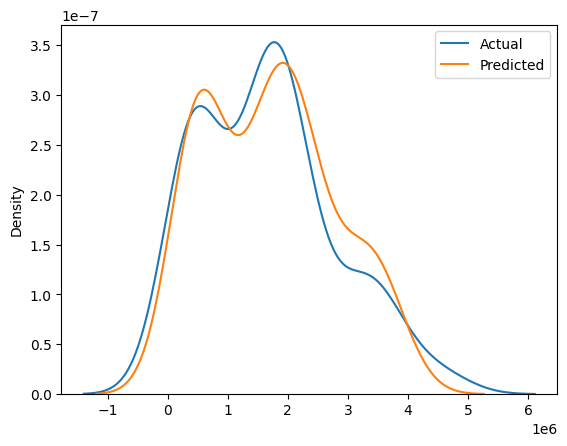

In [ ]:
# Visualisasi untuk melihat perbandingan data hasil prediksi dengan data aktual pada dataset
sns.distplot(y_test, hist=False, label='Actual')
sns.distplot(y_pred, hist=False, label='Predicted')
plt.legend()

In [ ]:
# Cek Akurasi Testing dan Training dari Model Linear Regression
print('Linear Regression')
LinReg_train = model.score(X_train,y_train)*100
LinReg_test = model.score(X_test, y_test)*100

#Menilai kinerja metode Linear Regression dengan membagi data sampel menjadi 10 lipatan secara acak.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(model,X,y,cv=LinReg_cv)

print('Train : ', LinReg_train)
print('Test  : ', LinReg_test)
print('\n The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  81.70881209289536
Test  :  84.41945727162701

 The Average Cross Validation Score is 81.79


**Hyperparameter Tuning**

Hyperparameter tuning adalah proses untuk menemukan kombinasi optimal dari hyperparameter pada suatu model machine learning untuk mencapai performa yang terbaik.

Tujuan dari hyperparameter tuning adalah untuk menemukan kombinasi hyperparameter yang menghasilkan model dengan performa terbaik pada data yang belum pernah dilihat sebelumnya (data validasi atau data uji).

Dengan melakukan hyperparameter tuning, kita dapat meningkatkan performa model machine learning dan menghasilkan model yang lebih akurat dan generalisasi pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Melihat parameter dari model Regresi Linear yang telah dibuat sebelumnya
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Hyperparameter tuning untuk menentukan optimum parameter pada model Linear Regression yang selanjutnya akan digunakan untuk melakukan prediksi yang lebih baik dan akurat

#Import library GridSearchCV sebagai library dalam mencari nilai parameter yang terbaik
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11), 
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(X_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best score is 0.8253359655313279


**Fit New Model**

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 1, positive= False)
LinReg_model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [ ]:
ypred_LinReg_model = LinReg_model.predict(X_test).reshape(-1,1)
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,588092.09
64,1999658.48
65,1796840.82
66,1807539.32
67,1369815.16


In [ ]:
y_train.head()

,Produksi
166,2603396.24
40,3447394.00
13,1552078.00
122,578346.00
89,370124.00


In [ ]:
ypred_LinReg_model

,0
0,572162.14
1,2092943.29
2,500369.39
3,406430.07
4,555108.47
...,...
63,588092.09
64,1999658.48
65,1796840.82
66,1807539.32


<ipython-input-519-761fbf268e49>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,label='Actual')
<ipython-input-519-761fbf268e49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')


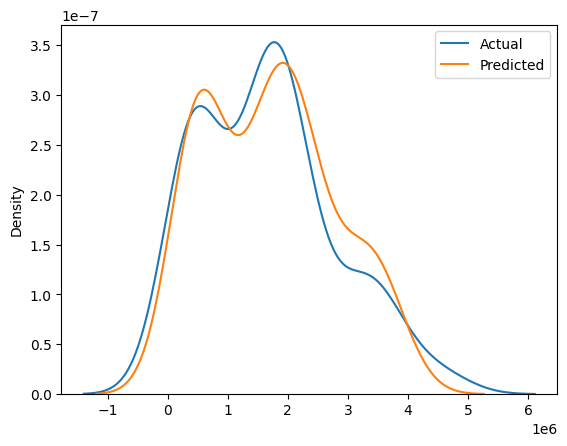

In [ ]:
#visualisasi hasil prediksi
sns.distplot(y_test,hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check Akurasi hasil testing dan training dari model Linear Regression
print('Linear Regression')
LinReg_model_train = LinReg_model.score(X_train,y_train)*100
LinReg_model_test = LinReg_model.score(X_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,X,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  81.70881209289536
Test  :  84.41945727162701 

The Average Cross Validation Score is 81.79


**2. Prediksi Menggunakan Algoritma Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Penentuan nilai optimal dari hyperparameter yang ingin diuji
param_dist = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [3, 5, 7, 9, 11],
              'min_samples_split': [2, 4, 6, 8, 10]}

#Buat objek Random Forest Regressor
rf = RandomForestRegressor()

#Buat objek RandomizedSearchCV untuk melakukan pencarian parameter acak
#Mencari hyperparameter terbaik 
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   random_state=0)

#Fit model dengan RandomizedSearchCV dan tentukan parameter terbaik
random_search.fit(X_train, y_train)
print(random_search.best_params_)



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

{'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 3}


In [ ]:
#Gunakan parameter terbaik untuk membangun model Random Forest
rf_best = RandomForestRegressor(n_estimators=300,
                                 max_depth=3,
                                 min_samples_split=4)
rf_best.fit(X_train, y_train)


<ipython-input-528-3ed370e5d947>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(X_train, y_train)


RandomForestRegressor(max_depth=3, min_samples_split=4, n_estimators=300)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=0)
RFReg.fit(X_train, y_train)



<ipython-input-529-1c07cc9f3d8c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X_train, y_train)


RandomForestRegressor(max_depth=3, n_estimators=300, random_state=0)

<ipython-input-531-08db1a4387d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,label='Actual')
<ipython-input-531-08db1a4387d5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_RFReg,hist=False,label='Predicted')


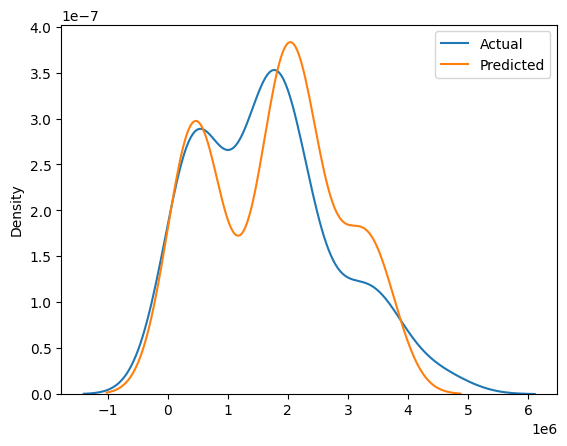

In [ ]:
ypred_RFReg = RFReg.predict(X_test).reshape(-1,1)
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

#visualisasi hasil prediksi
sns.distplot(y_test,hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(X_train,y_train)*100
RFReg_test = RFReg.score(X_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,X,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

Train :  88.37542061325297
Test  :  82.62187317479344 

The Average Cross Validation Score is 81.89


In [ ]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'bootstrap' : [True, False],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': np.arange(100, 501)}             

RFReg_tuning = RandomForestRegressor()

RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

RFReg_best_model = RFReg_search.fit(X_train, y_train)
print('Optimum parameters', RFReg_best_model.best_params_)
print('Best score is {}'.format(RFReg_best_model.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

Optimum parameters {'n_estimators': 122, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 8, 'bootstrap': True}
Best score is 0.837693888027687


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**FIt New Model**

In [ ]:
RFReg_model = RandomForestRegressor(n_estimators=122, max_depth=8, min_samples_split=10, min_samples_leaf=9, random_state=0)
RFReg_model.fit(X_train, y_train)

<ipython-input-538-aafdc041abeb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=10,
                      n_estimators=122, random_state=0)

In [ ]:
ypred_RFReg_model = RFReg_model.predict(X_test).reshape(-1,1)
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,444844.09
64,1989980.06
65,2042974.37
66,2108109.08
67,1885664.76


<ipython-input-541-f83763857741>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,label='Actual')
<ipython-input-541-f83763857741>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')


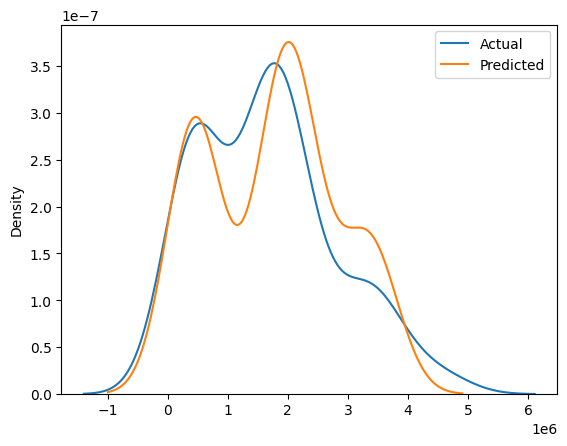

In [ ]:
#Visualisasi hasil prediksi
sns.distplot(y_test,hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(X_train,y_train)*100
RFReg_model_test = RFReg_model.score(X_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,X,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  88.03477038038852
Test  :  82.21163844717302 

The Average Cross Validation Score is 81.79


**Evaluasi Model untuk melihat Model terbaik dalam Prediksi Produksi Tanaman Padi**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(y_test,ypred_LinReg_model)*100,
                                  mean_absolute_error(y_test,ypred_LinReg_model),
                                  mean_squared_error(y_test,ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(y_test,ypred_RFReg_model)*100,
                              mean_absolute_error(y_test,ypred_RFReg_model),
                              mean_squared_error(y_test,y_pred_RFReg)]


In [ ]:
#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,84.419457,243823.767518,190471297901.907288
Random Forest,82.211638,283995.342271,212446666923.437683


Pada hasil evluasi model, nampak bahwa model Linear Regression memiliki nilai R2-score yang lebih tinggi (84.4%) dibandingkan Random Forest. Maka model Linear Regression menjadi pilihan terbaik untuk digunakan dalam memprediksi Produksi Tanaman Padi Pulau Sumatera

Uji Coba Prediksi Produksi Tanaman Padi Pulau Sumatera

**Menggunakan Linear Regression**

In [ ]:
# Uji coba prediksi Produksi Tanaman Padi Pulau Sumatera

#Data baru
data_baru_padi = pd.DataFrame({
                                'Luas Panen': [412000, 53000, 73490, 370120],	
                                'Curah hujan': [2530, 1870, 4120, 3600],
                                'Kelembapan': [80, 84, 89, 82],	 
                                'Suhu rata-rata': [28, 25, 22, 26]
})

data_baru_padi

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,412000,2530,80,28
1,53000,1870,84,25
2,73490,4120,89,22
3,370120,3600,82,26


In [ ]:
#Menggunakan LinReg_model untuk melakukan prediksi pada data baru
prediksi_produksi = LinReg_model.predict(data_baru_padi)

prediksi_produksi

array([[1774150.54217523],
       [ 337759.32126735],
       [ 674702.23298405],
       [1753889.00170494]])

In [ ]:
#Menambahkan hasil prediksi kedalam tabel data baru 
data_baru_padi.insert(4, 'Produksi', prediksi_produksi)

# merubah nilai pada kolom Produksi menjadi nilai yang mudah dibaca
pd.options.display.float_format = '{:.2f}'.format
data_baru_padi ["Produksi"] = data_baru_padi ["Produksi"]

data_baru_padi 

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
0,412000,2530,80,28,1774150.54
1,53000,1870,84,25,337759.32
2,73490,4120,89,22,674702.23
3,370120,3600,82,26,1753889.00


**DONE**